**Name**: Vedant Puranik

**Roll No.**: 43152

**Lab**: CL7

**Batch**: R9

**Assignment 9**: Support Vector Machine for classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix,roc_curve,auc
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from google.colab import files
import io

In [ ]:
mushroom_data = files.upload()

Saving mushrooms.csv to mushrooms (2).csv


In [ ]:
#train_df = pd.read_csv('train.csv')
df = pd.read_csv(io.BytesIO(mushroom_data['mushrooms.csv']))

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.shape

(8124, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**Attribute Information**:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [ ]:
df['class'].unique() #target variable

array(['p', 'e'], dtype=object)

In [ ]:
encoder = LabelEncoder()
for col in df.columns:
  df[col] = encoder.fit_transform(df[col])  

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
df['class'].unique()

array([1, 0])

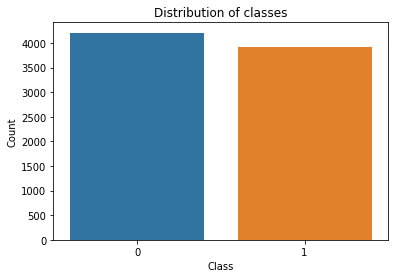

In [ ]:
sns.countplot(x=df['class'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of classes')
plt.show()

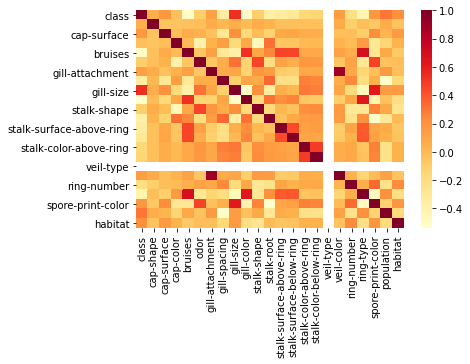

In [ ]:
sns.heatmap(df.corr(),cmap='YlOrRd')

In [ ]:
df['veil-type'].unique()

array([0])

In [ ]:
#Dropping veil-type
df.drop(columns=['veil-type'],inplace=True)

In [ ]:
corr_threshold = 0.2

corr = pd.DataFrame(df.corr()['class'])
corr['abs'] = np.abs(corr['class'])
corr = corr.sort_values(by='abs',ascending=False).drop('abs',axis=1).dropna().reset_index()
corr = corr.rename(columns={'index':'feature','class':'corr'}).loc[1:]

low_corr_features = list(corr[np.abs(corr['corr'])<=corr_threshold]['feature'])
reduced_df = df.drop(low_corr_features,axis=1)
reduced_df.shape

(8124, 12)

In [ ]:
reduced_df

,class,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-number,ring-type,population,habitat
0,1,1,0,1,4,3,2,2,1,4,3,5
1,0,1,0,0,4,2,2,2,1,4,2,1
2,0,1,0,0,5,2,2,2,1,4,2,3
3,1,1,0,1,5,3,2,2,1,4,3,5
4,0,0,1,0,4,3,2,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,11,0,2,2,1,4,1,2
8120,0,0,0,0,11,0,2,2,1,4,4,2
8121,0,0,0,0,5,0,2,2,1,4,1,2
8122,1,0,0,1,0,0,2,1,1,0,4,2


In [ ]:
X = reduced_df.drop(columns=['class'])
y = reduced_df['class']

In [ ]:
X.shape

(8124, 11)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print('X_train.shape: {}\nX_test.shape: {}\ny_train.shape: {}\ny_test.shape: {}'.format(
    X_train.shape,X_test.shape,y_train.shape,y_test.shape
))

X_train.shape: (6093, 11)
X_test.shape: (2031, 11)
y_train.shape: (6093,)
y_test.shape: (2031,)


In [ ]:
#Model
model = SVC(C=1.0,kernel='rbf')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
#Results
print('Train Accuracy: {}'.format(model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(accuracy_score(y_test,y_pred)))

Train Accuracy: 0.9950763170851797
Test Accuracy: 0.9970457902511078


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1040
           1       1.00      0.99      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [ ]:
kfold = KFold(n_splits=7,shuffle=True,random_state=42)

In [ ]:
kfold_score = cross_val_score(model,X,y,cv=kfold)
print('7-Fold cross validation results =>\n\nAll scores: {}\nMean: {}\nStd. Deviation: {}'.format(
    kfold_score,np.mean(kfold_score),np.std(kfold_score)
))

7-Fold cross validation results =>

All scores: [0.99827735 0.99483204 0.99569337 0.99483204 0.99568966 0.99224138
 0.99741379]
Mean: 0.9955685178820705
Std. Deviation: 0.0018098028564229698


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[1040    0]
 [   6  985]]


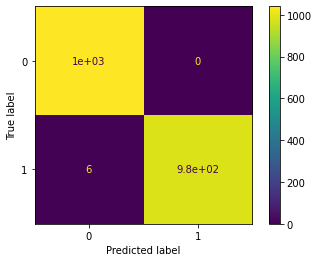

In [ ]:
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9969727547931382

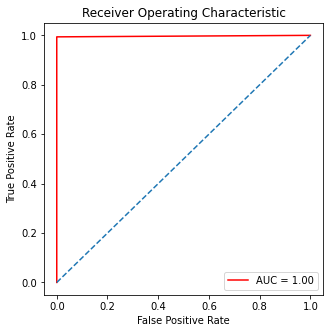

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
C = [0.01,0.1,1,10]
kernel = ['rbf','linear','poly']
all_results = pd.DataFrame(data={'C':{},'kernel':{},'Train Accuracy':{},'Test Accuracy':{}})
all_results

,C,kernel,Train Accuracy,Test Accuracy


In [ ]:
for c in C:
  for k in kernel:
    svm = SVC(C=c,kernel=k)
    svm.fit(X_train,y_train)
    y_pred = svm.predict(X_test)
    train_acc = svm.score(X_train,y_train)
    test_acc = accuracy_score(y_test,y_pred)
    data_df = pd.DataFrame(data={'C':[c],'kernel':[k],'Train Accuracy':[train_acc],'Test Accuracy':[test_acc]})
    all_results = all_results.append(data_df,ignore_index=True)

In [ ]:
all_results.sort_values(by='Test Accuracy',ascending=False)

,C,kernel,Train Accuracy,Test Accuracy
9,10.00,rbf,1.000000,1.000000
11,10.00,poly,1.000000,1.000000
6,1.00,rbf,0.995076,0.997046
8,1.00,poly,0.995076,0.997046
5,0.10,poly,0.988511,0.989168
3,0.10,rbf,0.985721,0.987691
2,0.01,poly,0.965698,0.968981
0,0.01,rbf,0.958477,0.963072
1,0.01,linear,0.944198,0.946824
4,0.10,linear,0.942557,0.945839
